# 10 Summary of findings and next steps

# Contents

1. Recap of problem statement
2. Insights from exploratory data analysis and baseline modelling
3. Model construction and evaluation
4. Findings from Machine Learning classification: Feature importance
5. 'So what?' Value for policymakers and jobseekers
6. Next steps

Before we proceed, let's import necessary libaries and our best models for our final interpretations:

In [1]:
import pandas as pd

In [2]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# Load models

best_model_logit = joblib.load('../models/best_model_logit.pkl')
best_model_dt = joblib.load('../models/best_model_DT.pkl')
# best_estimator_rf = joblib.load('../models/best_estimator_rf.pkl')
best_model_rf = joblib.load('../models/best_model_rf.pkl')
best_model_neuralnet = load_model('../models/best_model_nn.keras')

Importing variables used:

In [3]:
import joblib

# Load the saved data
X_train_resampled_df = joblib.load('../preprocessed_variables/X_train_resampled_df.pkl')
X_test_scaled_df = joblib.load('../preprocessed_variables/X_test_scaled_df.pkl')
y_train_resampled = joblib.load('../preprocessed_variables/y_train_resampled.pkl')
y_test = joblib.load('../preprocessed_variables/y_test.pkl')



# 1. Recap of problem statement

The primary objective of this project has been to answer the question:  

**Who’s likely to love their job? A Predictive Tool for Job Satisfaction, and Key Drivers**

Finding a job we 'love' is a critical issue in today's labor market, given its direct impact on productivity and individual well-being. However, achieving the right 'fit' between employees and their roles continues to be a challenge, as indicated by widespread job dissatisfaction and unemployment rates.

Moreover, measuring and predicting job satisfaction is inherently complex, with various subjective and objective factors playing a role. Thus, understanding who in the labor force self-reports as ‘satisfied’ is invaluable, as it helps uncover the reasons behind high or low satisfaction.

By developing a predictive tool, we aim to assist **policymakers** in designing programs that improve job satisfaction and **jobseekers** in identifying roles that will likely yield the highest satisfaction, ultimately enhancing both productivity and well-being.

# 2. Summary of data cleaning and preprocessing

The U.S. National Survey of College Graduates (NSCG) is a recurring survey conducted by the National Science Foundation (NSF) that collects detailed information on the educational background, employment status, and career paths of individuals with at least a bachelor's degree in the United States. 

The dataset used for this project spans four years of survey data collected by the NSF, covering a wide array of variables related to employment, job satisfaction, job tenure, education, and socio-economic factors.

A total of **200+ survey questions** were asked in the original survey, and through careful reading of survey questions and user guide documentation we identified 31+ employment specific questions asked by the creators of the survey (and this was before we began more in-depth feature engineering, selection, and preprocessing!)


#### Cleaning Process:

The process of cleaning the data involved multiple steps to ensure consistency and accuracy before any modelling could take place. Below is a summary of the key challenges and how they were addressed:

| **Challenge**                                      | **Approach to Resolution**                                                                 |
|----------------------------------------------------|--------------------------------------------------------------------------------------------|
| Inconsistent variable mappings across years        | Used **lists** and **loops** to map SAS format variables across years; checked for mismatches using assertions. |
| UNdertsanding what the most relevant survey questions would be, choosing from 200+ survey questions | Used domain knowledge to identify **31 core job-related survey questions** relevant for predicting satisfaction. |
| Appending datasets from four survey years          | Inspected one year’s data in detail, then **appended** all years together after data structure validation. |
| Handling missing values                            | Checked for any missing values or 'logical skips' where a respondent automatically skips a question - successfully confirmed no missing values, indicatign high quality of the dataset |
| Duplicate rows                                     | Identified and removed duplicates to ensure clean, non-redundant data, especially after merging                      |
| Reading large SAS datasets and parsing variables   | Read raw data using **pandas** with appropriate encoding; documented mappings to enhance readability, using loops to make the process more efficient |

#### **Preprocessing Process**:

In the preprocessing stage, we applied several techniques to prepare the data for machine learning, transforming the cleaned data into formats that models could easily interpret.

For example, we ensure binary coding of our target variable, given the distribution of overall job satisfaction:


### (a) Our original distribution of overall satisfaction scores indicated potential for binary classification - respondents generally liked their jobs

![Overall satisfaction](../visualisations/overall_satscore.png)

The majority of respondents fall into the two highest satisfaction categories: 

**45.28%** are *Somewhat Satisfied* and **44.45%** are *Very Satisfied*. Together, they account for nearly 90% of the population, which suggests a strong skew towards higher satisfaction.

The two lower satisfaction categories—*Very Dissatisfied* (**2.21%**) and *Somewhat Dissatisfied* (**8.06%*)—comprise only about 10% of the population. This imbalance justified grouping the satisfaction scores into two broader categories to better capture the underlying distribution.

Furthermore, Policymakers and jobseekers are primarily interested in knowing whether an individual is generally satisfied or dissatisfied with their job. Grouping into **'High Satisfaction'** and **'Low Satisfaction'** provides more actionable insights for decision-making and intervention design, without diluting the predictive power of the model by focusing on minor distinctions.

Thus, the decision to code the target variable as a binary classification of **'High Satisfaction'** or **'Low Satisfaction'** was both a practical and methodological choice, grounded in the data's distribution and the project's goals.


### (b) Components of 'overall job satisfaction' showed a similar distribution - suggesting focusing on 'overall' satisfaction is more suited as our target

![Job Satisfaction Scores](../visualisations/satscores.png)


#### Instead, this suggested that a more interesting area of exploration would be **how much are these other components of job satisfaction contributing to our overall job sa**tisfaction?'**

### (c)  However, we had to address the resulting class imbalance in our 'overall job satisfaction' target variable, using SMOTE

<div style="display: flex; justify-content: space-between;">
    <div style="text-align: center;">
        <img src="../visualisations/target_before_SMOTE.png" alt="Before SMOTE" style="width: 65%;">
        <p>Target Distribution Before SMOTE</p>
    </div>
    <div style="text-align: center;">
        <img src="../visualisations/target_after_SMOTE.png" alt="After SMOTE" style="width: 65%;">
        <p>Target Distribution After SMOTE</p>
    </div>
</div>


#### As we can see above, we address the original 90% positive/'High Satisfaction' class imbalance by applying SMOTE.

#### (d) This was one of many steps taken to get our data ready for modelling. The table below summarises key techniques applied.

For more detail, see our notebooks on preprocessing:

**Relevant Notebooks**

1. [Merging Survey Data](../notebooks/02%20Merging%20survey%20data,%20and%20initial%20preprocessing.ipynb)
   
2. [Initial Preprocessing](../notebooks/03%20Further%20EDA%20and%20preprocessing.ipynb)

3. [Preparation for Advanced Modelling](../notebooks/05%20Preparing%20for%20advanced%20modelling.ipynb)


| **Preprocessing Technique**                        | **Rationale/Impact on Model Performance**                                    |
|----------------------------------------------------|-----------------------------------------------------------------------------|
| Binary coding of target variable (`High Satisfaction` (1), `Low Satisfaction` (0) as `high_jobsat`) | Converted job satisfaction into a **binary classification** task based on distribution analysis. |
| Feature engineering for `job_duration`          | Created a new variable to capture job tenure based on the start year of current job. |
| Aggregation of categorical variables               | Combined low-frequency categories (e.g., ethnicity, region) to avoid sparsity and improve model robustness. |
| One-hot encoding for categorical variables         | Ensured that models could interpret categorical variables by converting them into binary vectors. |
| Standard Scaler                                    | Standardized numeric features to ensure features were on a comparable scale. |
| Addressing class imbalance using SMOTE             | Applied **SMOTE**, oversampling, to create synthetic examples and address class imbalance (90% 'High Satisfaction'). |

Through the data cleaning and preprocessing steps, the dataset was refined and optimised for machine learning models, ensuring that both the quality and usability of the data were maintained throughout the project.

# 2. Insights from Exploratory Data Analysis and baseline modelling

### (a)  Many respondents felt their job is important to society...and aligned well to the degree they studied. Perhaps these are good indicators of 'high satisfaction'?

![job importance](../visualisations/jobimportance.png)

* #### Over 50% report their job as ‘very important’ to society

* #### Over 60% report their job as ‘closely related’ to their academic background. Another potential indicator of ‘highly satisfied’ employees




### (b)  Our correlation matrix showed the statistical significance of a lot of features in the dataset in influencing 'high job satisfaction'...

![corr](../visualisations/corr.png)

##### 1. Our newly constructed `job_duration` matters - and has the potential to positively influence job satisfaction

##### 2. Components of job satisfaction scores, like your `satisfaction with career advancement opportunities, benefits and intellectual challenge' are signficiant influences on job satisfaction (deeper shades of red indicating stronger positive Pearson's correlation coefficients)

##### 3. Sentiments may vary by year of survey, for example respondents asked during a post Covid era (2021) may not have been as satisfied as their counterparts form pervious years

### (c)  Results from our **baseline** logistic regression confirmed a lot of our hypotheses, telling us the top 'predictors' of job satisfaction...

#### Highlights included, satisfaction with career advancement as **key**, job tenure, relevance to the degree you studied (people want to use the skills they learnt!), salary, and even marital status.

![base_logit_predictors](../visualisations/base_pos_predictors.png)

### (d)  In fact, this shed light on which features could increase or decrease your odds of being highly satisfied with your work...

* #### Those who studied a professional degree or phd maybe less likely to be satisfied with their work, as could being surveyed during 2021. 

* #### In contrast, ethnicity (white) could increase your odds of satisfaction in the workplace, as well as a range of select occupations and employment sectors...

![base_oddspredictors](../visualisations/base_odds.png)

# 3. Model construction and evaluation

### We wanted to go beyond this to see if we could improve our ability to classify 'Highly Satisfied' versus 'Unsatisfied' employees, developing a modelling roadmap:

### (a) Here's a recap of the 4 models we constructed, and key techniques and hyperparameter tuning:

![Model Roadmap](../visualisations/model_roadmap.png)

### (b) Random Forest came out on top, for both train...and test data accuracy

![train_test_accuracy](../visualisations/train_test_accuracy.png)

### (c) All models did better than 'random guessing', with the most complex models doing best (Random Forest and Neural Network)

#### Across all thresholds, Random Forest had the highest overall performance with an AUC score of 0.91:

![roc](../visualisations/roc.png)

### (d) We saw good performance across classification accuracy for 'High Satisfaction' (Class 1)

* #### Our Random Forest model still came out on top in this area

* #### Whilst our neural network wasn’t the best overall, it’s precise in predicting ‘highly satisfied’ individuals


![class1](../visualisations/class1.png)

### (e) Performance was less consistently good for identifying 'High Satisfaction' (Class 1)

* #### Our Random Forest model still came out on top in this area - but it doesn’t do as well with spotting all unsatisfied respondents (Recall)

* #### Whilst our neural network wasn’t the best overall, it has better recall: identifying unsatisfied individuals

![class0](../visualisations/class0.png)

### (f) There's room for improvement for both our Random Forest and Neural Network models...

#### Our models are still getting 'confused' when it comes to classifying individuals with 'Low Satisfaction', given the original class imbalance in our dataset...

<div style="display: flex; justify-content: space-between;">
    <div style="text-align: center;">
        <img src="../visualisations/confusion_rf.png" alt="Confusion Matrix RF" style="width: 85%;">
        <p>Confusion Matrix - Random Forest</p>
    </div>
    <div style="text-align: center;">
        <img src="../visualisations/confusion_nn.png" alt="Confusion Matrix NN" style="width: 85%;">
        <p>Confusion Matrix - Neural Network</p>
    </div>
</div>


### How can we interpret these confusion matrices?

1. The Random Forest performs well in predicting 'High Satisfaction' but struggles with 'Low Satisfaction', primarily due to the high number of false positives. Improving minority class precision could significantly enhance model performance.

2. The Neural Network shows better performance in predicting 'Low Satisfaction' with fewer false positives, but at the cost of a higher number of false negatives for 'High Satisfaction.' This indicates a trade-off between precision for Class 0 and recall for Class 1.

So future iterations of the models need to work at addressing these misclassifications. Here are some recommendations:

### Overall recommendations for improving model performance

Given that class imbalance techniques (such as SMOTE) have already been applied, our next steps should focus on **refining and optimising hyperparameters** using robust approaches like **RandomizedSearchCV** for broader exploration and **GridSearchCV** for fine-tuning. Below are specific recommendations for improving performance through better hyperparameter tuning approaches and alternative models:

#### 1. Hyperparameter Tuning for Random Forest:

- **RandomizedSearchCV**: This approach is ideal for exploring a wide range of hyperparameters without the computational intensity of an exhaustive search. We can use this to identify key hyperparameters such as tree depth, number of trees, and sample sizes that offer a good trade-off between model complexity and performance.
  
- **GridSearchCV**: After narrowing down promising ranges through RandomizedSearchCV, we can apply **GridSearchCV** to more precisely fine-tune specific hyperparameters. This approach works well once a range has been identified, allowing for an exhaustive search within smaller parameter spaces, ensuring optimal model performance.

#### 2. Hyperparameter Tuning for Neural Network:

- **RandomizedSearchCV**: Neural Networks involve multiple key hyperparameters (learning rate, dropout rate, batch size, etc.), and RandomizedSearchCV provides a more efficient way to explore these combinations broadly. This can help identify ranges of values that yield the best performance in terms of both precision and recall.
  
- **GridSearchCV**: Once we’ve identified potential ranges through RandomizedSearchCV, use **GridSearchCV** to more rigorously tune these parameters. This focused search will help achieve the best balance between model generalization and overfitting, especially when optimizing dropout, regularization, and learning rates.

### Why bother?

1. Our Random Forest model will provide great insight into drivers of 'High Satisfaction' and greater accurayc of classifying these satisfied individuals - important for understanding how common high satisfaction is, and 'ingredients of success'

2. While Neural Networks are computationally expensive, it has really good potential to **better identify unsatisfied individuals** (minority class) and provide isnights into how we can target and drive up satisfaction for these employee groups. So it's certainly worth the time and effort to tune this further!

# 4. Findings from Machine Learning Classification: Feature importance

### (a) We analysed feature importance from our best-performing model, the Random Forest, to understand which factors are most influential in predicting job satisfaction.

In [5]:
feature_name_mapping_top_10 = {
    'num__satisfaction_advancement': 'Satisfaction with Career Advancement',
    'num__satisfaction_challenges': 'Satisfaction with Intellectual Challenge during Job',
    'num__satisfaction_salary': 'Satisfaction with Salary',
    'num__satisfaction_security': 'Satisfaction with Job Security',
    'num__satisfaction_location': 'Satisfaction with Job Location',
    'num__salary': 'Salary',
    'num__age': 'Age',
    'cat__survey_year_2021-01-01': 'Survey Year: 2021',
    'num__satisfaction_benefits': 'Satisfaction with Job Benefits',
    'num__job_duration_months': 'Job Duration (Months)'
}


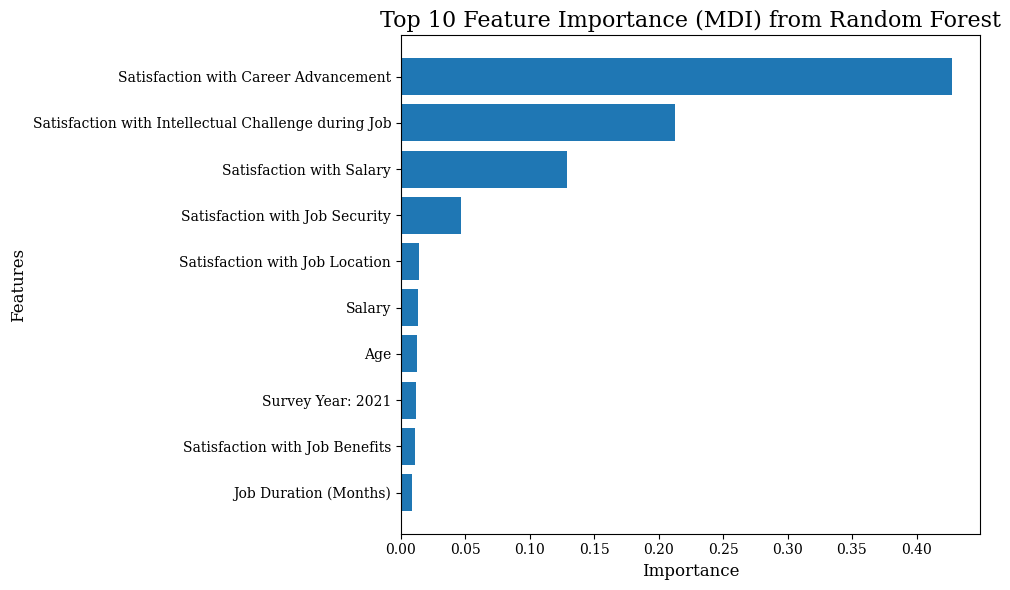

In [6]:
import matplotlib.pyplot as plt
import matplotlib

# Access feature importances from the fitted Random Forest model
feature_importances = best_model_rf.named_steps['model'].feature_importances_

# Get the feature names (assuming X_train_resampled_df is a DataFrame)
feature_names = X_train_resampled_df.columns

# Sort feature importances in descending order and select the top 10
sorted_indices = np.argsort(feature_importances)[::-1][:10]

# Map feature names to readable labels
readable_feature_names = [feature_name_mapping_top_10.get(feature_names[i], feature_names[i]) for i in sorted_indices]

# Set the font to serif
matplotlib.rcParams['font.family'] = 'serif'

# Plotting the top 10 feature importances, with the highest at the top
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importance (MDI) from Random Forest', fontsize=16)
plt.barh(range(10), feature_importances[sorted_indices], align='center')
plt.yticks(range(10), readable_feature_names)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Increase font size for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Tight layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


### Feature Importance (MDI) from Random Forest

This chart shows the **Top 10 Feature Importances** from the Random Forest model using the **Mean Decrease in Impurity (MDI)** method, which is a common technique to estimate feature importance in tree-based models.

#### What MDI Means:
- **MDI (Mean Decrease in Impurity)** measures the total decrease in **Gini impurity** or **entropy** across all trees in the forest that a particular feature contributes to when making splits. 
- Essentially, MDI quantifies how much a feature helps reduce uncertainty or "impurity" about the outcome (in this case, job satisfaction).
- The larger the mean decrease in impurity for a feature, the more important it is deemed to be in predicting the target variable.

#### Key Observations:
1. **Satisfaction with Career Advancement** is by far the most important feature, with the highest MDI score. This aligns well with our overall hypothesis and problem statement. Jobseekers and employees are likely to place great value on opportunities for growth, and satisfaction with career advancement has emerged as a key driver for predicting overall job satisfaction.

2. **Satisfaction with Intellectual Challenge during Job** also ranks highly in feature importance. This emphasises the importance of engaging, meaningful work—again, a key consideration in why people might report high satisfaction with their jobs.

3. **Satisfaction with Salary** ranks third in importance. While salary is often viewed as a primary determinant of job satisfaction, it is noteworthy that **non-monetary factors** such as career advancement and intellectual challenge rank higher. This reinforces the idea that **intrinsic rewards** play a significant role in overall job satisfaction.

4. **Satisfaction with Job Security** is next in line. This suggests that stability and long-term security are still critical factors in job satisfaction, especially in uncertain economic times.

5. **Satisfaction with Job Location**, while less important than the aforementioned factors, still holds weight in determining job satisfaction, indicating that work-life balance and geographical considerations matter to employees.

#### Less Important Features:
- **Age**, **Salary (raw variable)**, and **Job Duration (Months)** have lower importance in this model. Although job tenure and salary are important for career longevity and income, they do not seem to influence satisfaction as heavily as subjective feelings about career progression, job security, or intellectual challenge.

- The **survey year** is included in the top 10 but ranks lower, showing that while there may be year-over-year trends in satisfaction, it is not a dominant factor.

#### How This Tallies with Previous Interpretations:
- This ranking of feature importance supports the **story we've been telling** through our exploratory data analysis (EDA) and model evaluations: 
  - **Non-monetary factors** such as satisfaction with career growth, intellectual stimulation, and job security have a significant impact on overall job satisfaction.
  - While salary and job tenure matter, they play a **secondary role** compared to factors that relate to personal fulfillment and job stability.
  
- The model results suggest that **career development** and opportunities for **challenging, meaningful work** are the strongest predictors of high job satisfaction, which is consistent with the narrative we’ve been building throughout our analysis.

By focusing on these core drivers of satisfaction, we can provide actionable insights for both **jobseekers** and **policymakers**, reinforcing the value of aligning personal career goals with workplace opportunities for growth, stability, and intellectual engagement.


### (b) We also explored local interpretations using **LIME** (Local Interpretable Model-agnostic Explanations), a technique that helps explain what features contribute most to an individual’s probability of high job satisfaction.


Loading our more readable variables to support with interpretation:

In [18]:
# Loading a readable X_train and X_test dataset
import joblib

# Load X_train_readable and X_test_readable from the joblib dump
X_train_readable = joblib.load('../preprocessed_variables/X_train_readable.pkl')
X_test_readable = joblib.load('../preprocessed_variables/X_test_readable.pkl')


Ensuring LIME uses the correct mappings:

In [19]:
# Label mapping
label_mapping = {0: 'Low Satisfaction', 1: 'High Satisfaction'}

### What We're Trying to Show:

The goal is to interpret individual predictions for job satisfaction using LIME (Local Interpretable Model-agnostic Explanations). LIME provides local explanations, meaning it explains how certain features of a particular instance influence that specific prediction (whether it’s predicting high or low satisfaction).

In this case, we're plotting the probability scores for four individual test instances. Each plot shows the model's predicted probability of 'High Satisfaction' vs. 'Low Satisfaction' for a single person o r'test instance', using 4 different rows of our X_test data. 


This helps answer the question:

**What is the likelihood that this specific individual will report high job satisfaction?**

### How LIME works:

For each individual test instance, LIME helps us understand why the model predicts a higher probability for 'High Satisfaction' or a lower one for 'Low Satisfaction'. It breaks down the feature importance for that specific instance to show which features are pushing the prediction in a particular direction.

This can be really important for users who want to understand what features can influence their probability for high or low satisfaction.

Initializing LIME Explainer with training data...

Explaining prediction for test instance at index 7998...


/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    3.9s finished
/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.0s finished


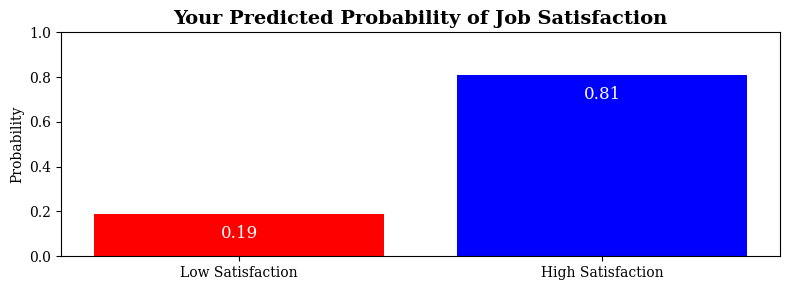

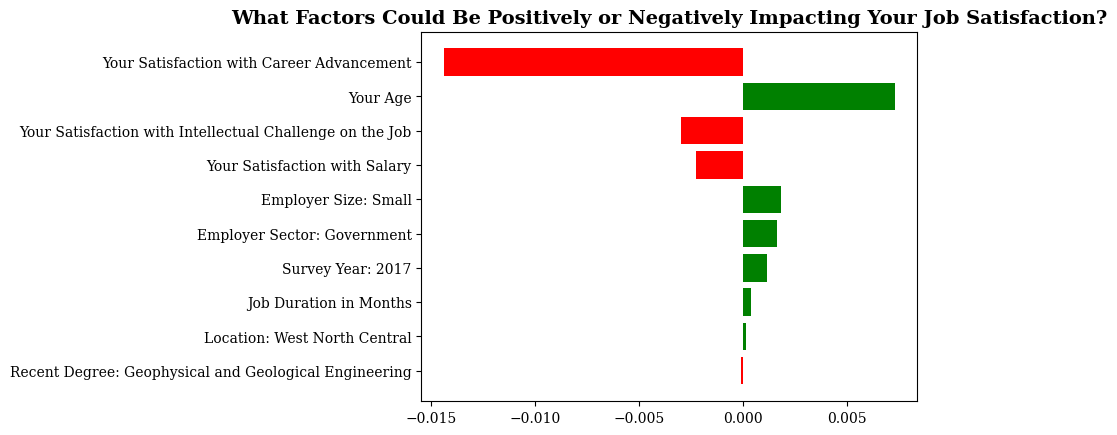


Explaining prediction for test instance at index 48013...


/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    4.0s finished
/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.0s finished


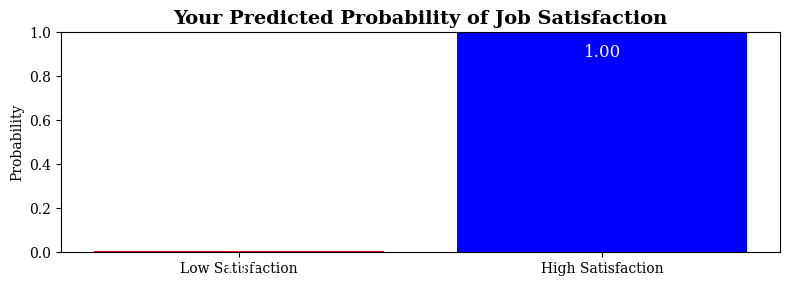

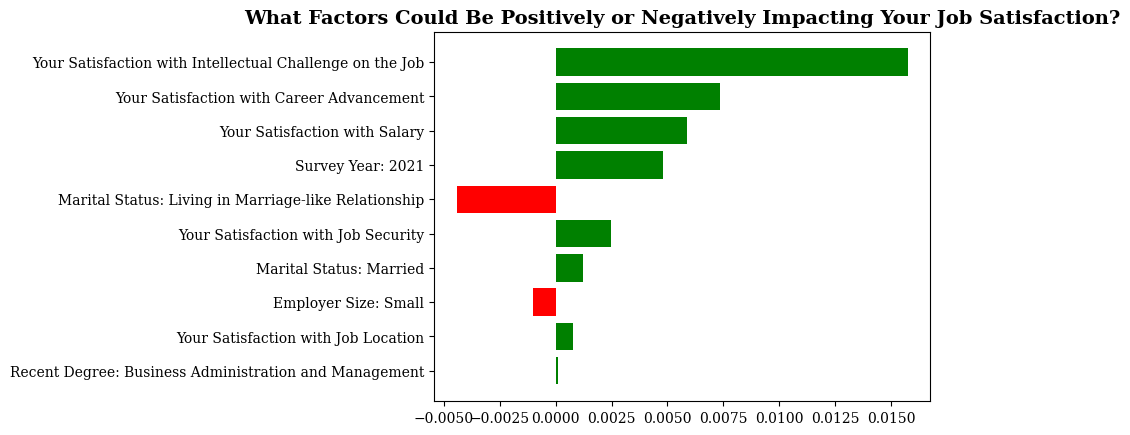


Explaining prediction for test instance at index 85170...


/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    3.9s finished
/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.0s finished


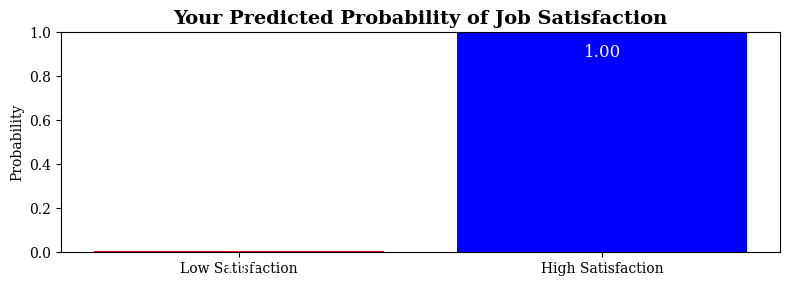

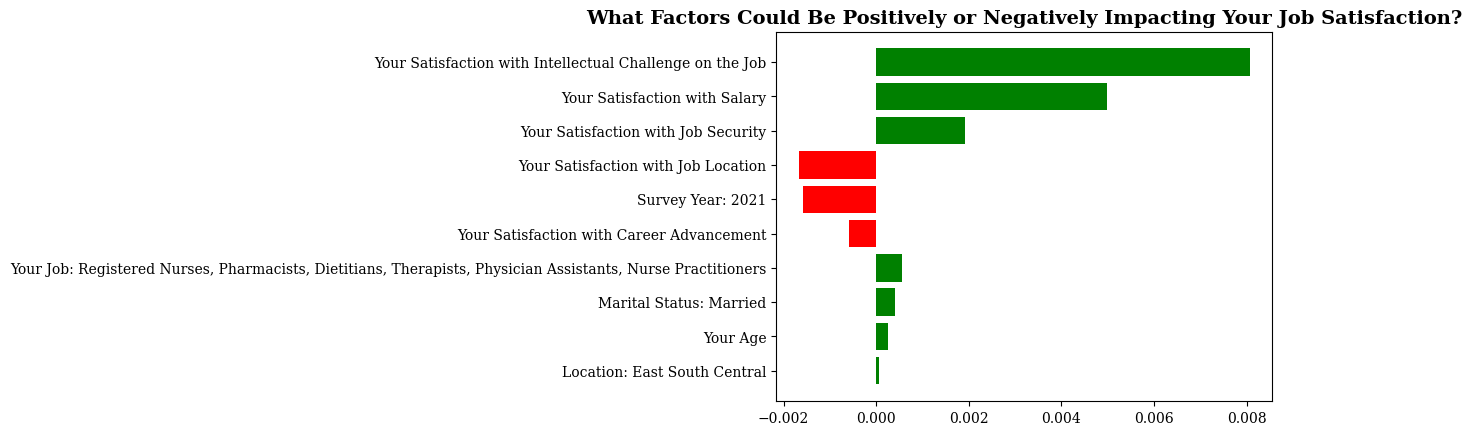


Explaining prediction for test instance at index 72869...


/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    4.1s finished
/opt/anaconda3/envs/nivi_capstone/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.0s finished


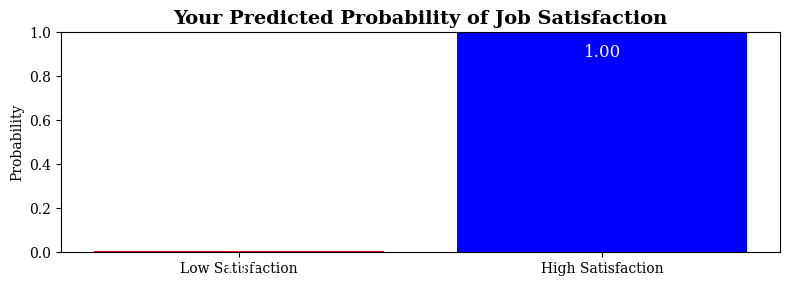

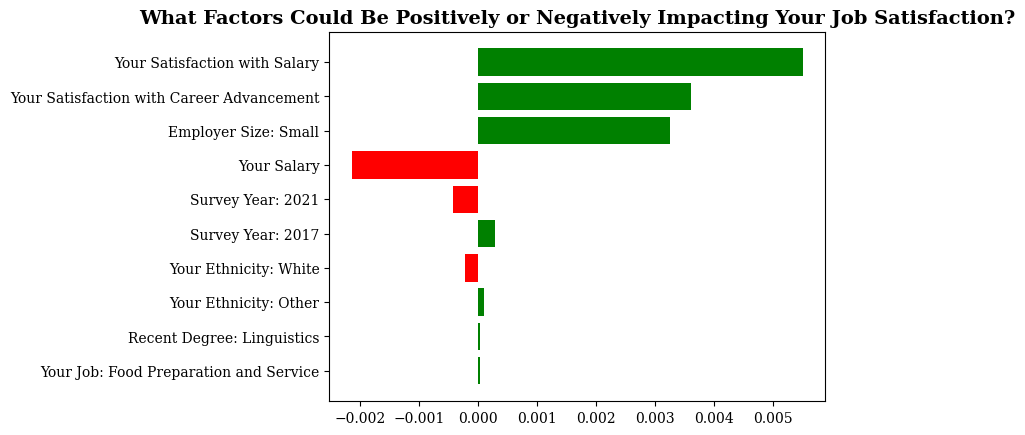

In [21]:
# Import the necessary libraries
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # For creating dataframes

# Assuming best_model_rf is your trained pipeline
rf_model = best_model_rf.named_steps['model']  # Extract RandomForestClassifier from the pipeline

# Label mapping for class names
label_mapping = {0: 'Low Satisfaction', 1: 'High Satisfaction'}

# Step 2: Initialize the LIME explainer using training data
print("Initializing LIME Explainer with training data...")

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_readable.values,              # Use training data for creating synthetic samples
    feature_names=X_test_readable.columns,              # Cleaned and mapped feature names
    class_names=[label_mapping[0], label_mapping[1]],   # Ensure class 0 is 'Low Sat' and class 1 is 'High Sat'
    mode='classification',                              # This is a classification problem
    discretize_continuous=False,                        # Discretize continuous features if necessary
    sample_around_instance=True,                        # Sample around the instance being explained
)

# Step 3: Choose 4 random test instances
random_indices = np.random.choice(X_test_scaled_df.index, size=4, replace=False)  # Randomly pick 4 rows

# Step 4: Loop through the test instances, displaying the mini bar plot for probabilities, then the LIME plot
for i, idx in enumerate(random_indices):
    test_instance = X_test_scaled_df.loc[idx]  # Extract the test instance as a Series (preserving column names)
    
    print(f"\nExplaining prediction for test instance at index {idx}...")

    # Generate the LIME explanation for the chosen instance
    explanation = explainer.explain_instance(
        data_row=test_instance.values,          # Pass the test instance's values directly
        predict_fn=rf_model.predict_proba,      # The predict_proba function from the RandomForest model
        num_features=10,                        # The number of features to include in the explanation
        num_samples=800000                       # Adjusted for balance between stability and computation time
    )

    # Get predicted probabilities for the current test instance
    probs = rf_model.predict_proba([test_instance])[0]

    # Create a mini bar plot to visualize the predicted probabilities
    plt.figure(figsize=(8, 3))  # Increase the figure size to make it less squashed
    bars = plt.bar([label_mapping[0], label_mapping[1]], probs, color=['red', 'blue'])
    
    # Add labels and titles to make it clear
    plt.title("Your Predicted Probability of Job Satisfaction", fontsize=14, fontweight='bold')
    plt.ylabel('Probability')
    plt.ylim(0, 1)  # Limit y-axis to 0-1 to reflect probabilities
    
    # Add probability labels inside the bars
    for bar, p in zip(bars, probs):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{p:.2f}', ha='center', va='top', color='white', fontsize=12)

    # Show the probability plot
    plt.tight_layout()
    plt.show()

    # Plot the LIME explanation for the current instance
    explanation.as_pyplot_figure()

    # Set title for the LIME plot with a more engaging question
    plt.title("What Factors Could Be Positively or Negatively Impacting Your Job Satisfaction?", fontsize=14, fontweight='bold')

    # Show the plot for the current instance
    plt.show()


## Explaining what this means

Let's take one of the examples/test instances above as a potential user who's interested in learning about what could be informing their job satisfaction.

In this case our random forest model and LIME seeks to explain one of the 'test instances' we see, to explain the probability score, and contributing factors:

## For one particular test instance, it outputs the following probability score and feature importance/coefficients:

<div style="display: flex; justify-content: space-between;">
    <div style="text-align: center;">
        <img src="../visualisations/lime_test_predprob.png" alt="LIME Predicted Probabilities" style="width: 95%;">
        <p>LIME Predicted Probabilities</p>
    </div>
    <div style="text-align: center;">
        <img src="../visualisations/lime_test_factors.png" alt="LIME Contributing Factors" style="width: 95%;">
        <p>LIME Test Factors</p>
    </div>
</div>

## What could this be telling us?

1. For this particular individual, they're highly likely to experience high job satisfaction (81% likely)

2. From training our model, factors like their age, company size and emloyer sector are likely to be some of the factors pushing their likelihood of 'high satisfaction' up

3. In contrast, it looks like their satisfaction with career advancement could be driving their satisfaction **down**, so the user may want to look into what their levels of satisfaction are and whether this needs further investigation.


# 5. 'So what?' Value for policymakers and jobseekers

#### Given someone with a similar profile/attributes to what they've inputted, the model predicts their likelihood of job satisfaction and identifies contributing factors. This can be valuable for both **policymakers** and **jobseekers** in the following ways:

<div style="display: flex; justify-content: space-between;">
    <div style="width: 40%; text-align: center;">
        <img src="../interactive_app/policy.png" alt="policymakers" style="width: 55%;">
    </div>
    <div style="width: 55%; font-size: 18px;">  <!-- Increased font size here -->
        <h3 style="font-size: 26px;">1. Value for Policymakers</h3>  <!-- Increased heading size -->
        <ul>
            <li><strong>Explore and address wider disparities in job satisfaction</strong> - the model can reveal which demographics, industries, or regions experience lower satisfaction, offering data-driven guidance on where interventions may be most needed.</li>
            <li><strong>Use insights to formulate targeted labour market interventions</strong> - by understanding which factors (e.g., salary, job security, career advancement) are key drivers, policymakers can craft policies to improve conditions where it matters most.</li>
            <li><strong>Revise and update the predictive model against a changing landscape</strong> - the labor market is dynamic, and regular updates to the model can ensure that insights remain relevant as the job market evolves.</li>
        </ul>
    </div>
</div>


<div style="display: flex; justify-content: space-between;">
    <div style="width: 40%; text-align: center;">
        <img src="../interactive_app/jobseeker.png" alt="jobseekers" style="width: 55%;">
    </div>
    <div style="width: 55%; font-size: 18px;">  <!-- Increased font size here -->
        <h3 style="font-size: 26px;">2. Value for Jobseekers</h3>  <!-- Increased heading size -->
        <ul>
            <li><strong>Understand drivers of job satisfaction, individualised</strong> - this model allows jobseekers to see what might lead to greater satisfaction based on factors unique to their profile (e.g., career advancement, salary, location).</li>
            <li><strong>Keep up-to-date with labour market trends</strong> - jobseekers can also see broader trends, such as which degrees or industries are associated with higher satisfaction, enabling them to align their choices with market realities.</li>
            <li><strong>Hone in their job search on maximising satisfaction</strong> - equipped with this insight, jobseekers can focus their job search on positions and employers most likely to offer the aspects of work that they value most, such as intellectual challenge or work-life balance.</li>
        </ul>
    </div>
</div>

# 6. Next Steps

While we've demonstrated the value of the model using tools like **LIME** to explain individual predictions, there are several key steps ahead to further develop this work into a robust **proof of concept application**.

## 1. In-depth Hyperparameter Tuning for the Neural Network
The current model performance has provided valuable insights, but there is room for improvement, particularly with the **Neural Network** model. Future iterations will focus on:
- **GridSearchCV** and **RandomizedSearchCV** for hyperparameter tuning.
- Fine-tuning parameters such as **learning rate**, **batch size**, **regularization strength**, and **number of layers/neurons** to optimize the **classification accuracy**.
- Experimenting with advanced techniques like **dropout** and **early stopping** to prevent overfitting and enhance generalization.

## 2. Web Scraping Job Forums and Postings
To enrich the model’s understanding of **job satisfaction drivers**, web scraping techniques will be employed to gather data from:
- **Job forums** where employees discuss their job experiences, challenges, and satisfaction levels.
- **Job postings** to analyze trends in skill requirements, job roles, benefits, and perks that may influence job satisfaction.
- This unstructured data will help **complement** the existing dataset and provide additional insights into emerging trends and employee expectations.

## 3. Developing the Proof of Concept Application and Use Case

The end goal is to explore the development of an application that enables:

- **Jobseekers** to input their profile details and receive predictions about their likelihood of job satisfaction, as well as the factors contributing to that prediction.
- **Policymakers** to explore trends in job satisfaction across industries, demographics, and geographies, allowing for targeted interventions.

**Key features of the proof of concept application**:

- **User-friendly interface** that visualizes predictions and provides explanations using LIME.
- **Customisable inputs** for jobseekers to adjust variables such as salary expectations, job location, and role-specific factors.
- **Real-time data** updates from job postings to keep the model relevant in a changing labor market.

By iterating on these next steps, this model can evolve into a valuable tool for both **jobseekers** and **policymakers**, offering actionable insights into job satisfaction and its key drivers.



In [22]:
X_test_readable.columns

Index(['Your Satisfaction with Salary',
       'Your Satisfaction with Career Advancement',
       'Your Satisfaction with Benefits',
       'Your Satisfaction with Intellectual Challenge on the Job',
       'Your Satisfaction with Job Location',
       'Your Satisfaction with Job Security', 'Your Salary',
       'Your View on Job’s Contribution to Society',
       'Your Job-Degree Alignment', 'Your Age',
       ...
       'Location: New England', 'Location: Other', 'Location: Pacific',
       'Location: South Atlantic', 'Location: U.S. Territory',
       'Location: West North Central', 'Location: West South Central',
       'Your Ethnicity: Black', 'Your Ethnicity: Other',
       'Your Ethnicity: White'],
      dtype='object', length=325)